In [89]:
from shapely.geometry import Point
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [137]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones.head()

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [138]:
type(promise_zones)

geopandas.geodataframe.GeoDataFrame

In [139]:
promise_zones = promise_zones.to_crs('EPSG:4326')


In [140]:
print(promise_zones.crs)

EPSG:4326


In [141]:
type(promise_zones)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

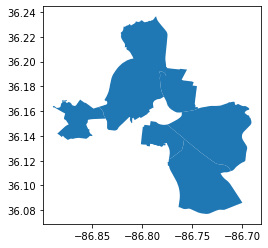

In [142]:
promise_zones.plot()

In [54]:
may = pd.read_pickle('../data/may.pkl')
june = pd.read_pickle('../data/june.pkl')
july = pd.read_pickle('../data/july.pkl')

In [94]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,1,0,1
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,1,0,1
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,1,0,1
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,1,0,1
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,1,0,1


In [95]:
may.dtypes

pubdatetime    datetime64[ns]
latitude              float64
longitude             float64
sumdid                 object
chargelevel           float64
companyname             int64
day                     int64
hour                    int64
minute                  int64
dtype: object

700am-705am, for all of may pings

In [96]:
may['day'] = may['pubdatetime'].dt.day
may['hour'] = may['pubdatetime'].dt.hour
may['minute'] = may['pubdatetime'].dt.minute


may.head(3)
may.tail()


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5,31,23,59
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5,31,23,59
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5,31,23,59
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5,31,23,59
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5,31,23,59


In [97]:
may.dtypes

pubdatetime    datetime64[ns]
latitude              float64
longitude             float64
sumdid                 object
chargelevel           float64
companyname             int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [98]:
wednesday = [1,8,15,22,29]

may_wednesday_700am = may[(may['day'].isin(wednesday)) & (may['hour'] == 7) & (may['minute'] < 5)]
    
may_wednesday_700am


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0
...,...,...,...,...,...,...,...,...,...
17543326,2019-05-29 07:04:44.027,36.121163,-86.770794,Powered2499,82.0,2,29,7,4
17543327,2019-05-29 07:04:44.027,36.121317,-86.770412,Powered2311,70.0,2,29,7,4
17543328,2019-05-29 07:04:44.027,36.121222,-86.770480,Powered2460,35.0,2,29,7,4
17543329,2019-05-29 07:04:44.027,36.121217,-86.770563,Powered2158,73.0,2,29,7,4


In [143]:
may_wednesday_700am['geometry'] = may_wednesday_700am.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
may_wednesday_700am.head(3)

C:\Users\jerem\AppData\Local\Temp/ipykernel_5528/1875594164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_wednesday_700am['geometry'] = may_wednesday_700am.apply(lambda x: Point((x.longitude,


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148)
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.770228 36.121393)
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0,POINT (-86.81153999999999 36.144292)


In [144]:
may_wednesday_700am_geo = gpd.GeoDataFrame(may_wednesday_700am, 
                           crs = promise_zones.crs, 
                           geometry = may_wednesday_700am['geometry'])

In [145]:
type(may_wednesday_700am_geo)

geopandas.geodataframe.GeoDataFrame

In [146]:
may_wednesday_700am_geo.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148)
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.77023 36.12139)
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0,POINT (-86.81154 36.14429)
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0,POINT (-86.77033 36.12162)
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0,POINT (-86.77009 36.12157)


In [147]:
may_wed_700am_zoned = gpd.sjoin(may_wednesday_700am_geo, promise_zones, op = 'within')

In [148]:
promise_zones.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


In [149]:
may_wed_700am_zoned.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148),3,4,4,2.713638e+08,74348.596054
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.77023 36.12139),3,4,4,2.713638e+08,74348.596054
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0,POINT (-86.77033 36.12162),3,4,4,2.713638e+08,74348.596054
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0,POINT (-86.77009 36.12157),3,4,4,2.713638e+08,74348.596054
154608,2019-05-01 07:00:03.897,36.121421,-86.770544,Powered658,98.0,2,1,7,0,POINT (-86.77054 36.12142),3,4,4,2.713638e+08,74348.596054


FOLIUM MAP

In [ ]:
nashville_center = [36.1627, -86.7816]

In [ ]:
folium_map = folium.Map(location =  nashville_center, zoom_start = 13)
folium_map

In [ ]:
promise_zones.head()

May 1st, 700AM-705AM pings

In [60]:

may_1_700am = may[(may['pubdatetime'] > '2019-05-01 07:00:00.000') & (may['pubdatetime'] < '2019-05-01 07:05:00.000')]
    
may_1_700am

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0
...,...,...,...,...,...,...,...,...,...
156295,2019-05-01 07:04:20.500,36.177628,-86.749622,Powered904318,41.0,1,1,7,4
156296,2019-05-01 07:04:20.610,36.134934,-86.777447,Powered787594,48.0,1,1,7,4
156297,2019-05-01 07:04:20.687,36.166141,-86.768851,Powered336823,44.0,1,1,7,4
156298,2019-05-01 07:04:20.873,36.145961,-86.793938,Powered643133,46.0,1,1,7,4


In [19]:
may_1_700am['geometry'] = may_1_700am.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
may_1_700am.head(3)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,POINT (-86.77045 36.12148)
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,POINT (-86.770228 36.121393)
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,POINT (-86.81153999999999 36.144292)
